# 神经网络的多分类问题

In [50]:
import numpy
from scipy.io import loadmat#读取mat文件
import matplotlib.pyplot as plt

这里的分类还20*20像素的手写数字  
前置神经网络感觉就像是多重逻辑回归的组合体  
输入是400个特征加一个常量，输入到隐藏层的25个神经元（也就是25个逻辑回归）  
到隐藏层后是25个特征加一个常量，输入到10个输出层（也就是10个逻辑回归）

### sigmoud函数

In [51]:

def sigmoid(z):
    return 1/(1+numpy.exp(-z))

### 对sigmoid函数进行求导
然后开始反向传播
反向传播前先写好基础的sigmoid函数的梯度下降公式，简单求导可知

In [52]:
def Dsigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

### 获取需要的数据
获取手写数字矩阵、对标签进行onehot编码、随机生成theta

In [53]:
def getData():
    data=loadmat("ex4data1.mat")
    x=numpy.insert(data['X'],0,numpy.ones((5000)),axis=1)
    y=numpy.array(data['y'])
    ynum=numpy.array(data['y'])
    y=numpy.zeros((x.shape[0],10))
    for i in range(len(ynum)):
        y[i][ynum[i]-1]=1
    theta1=(numpy.random.random((25,x.shape[1]))-0.5)*0.25
    theta2=(numpy.random.random((10,26))-0.5)*0.25
    # theta1=numpy.array(numpy.load('theta1.npy'))
    # theta2=numpy.array(numpy.load('theta2.npy'))
    return x,y,theta1,theta2

### 向前传播

In [54]:
def propagate_forward(x,theta1,theta2):
    z1=x@theta1.T
    h1=sigmoid(z1)
    h1=numpy.insert(h1,0,numpy.ones((5000)),axis=1)
    z2=h1@theta2.T
    h2=sigmoid(z2)
    return h2,h1

### 代价函数
这里的代价函数看公式是把所有的逻回归的代价求和  
单个逻辑回归，知道计算出来的结果和实际结果  
但是现在神经网络加了一个隐藏层  
（可以知道的是输入和输出以及正确结果，但是隐藏层的正确结果不知道）  
看答案的代价函数，只考虑输入与输出，没有计算隐藏层怎么样  
<img style="float: left;" src="nn_regcost.png">

In [55]:
def cost(y,h2,theta1,theta2,L):
    m=y.shape[0]
    price=(-y*numpy.log(h2)-(1-y)*numpy.log(1-h2)).sum()/m
    regularization=(numpy.power(theta1,2).sum()+numpy.power(theta2,2).sum())*L/(2*m)
    return price+regularization

### 反向传播
理解反向传播，见笔记新增的连接与图片  
代价函数求得的代价是最终结果的误差  
这个误差要不断的向后去寻找误差源，简单来说，传播过程中权重比较大的值就说明他贡献的误差较大  
以此来不断的向后去更新他们的权重  
最终的目的就是求总体对改权重的偏导(通过链式求导法则)  

In [56]:
def back_propagation(theta1,theta2,x,errorValue,h1,dh1):
    decline2=numpy.zeros((10,26))
    decline1=numpy.zeros((25,401))
    for i in range(5000):
        decline2=decline2+errorValue[i].reshape(-1,1) @ h1[i].reshape(-1,1).T

        a=errorValue[i].reshape(-1,1).T@theta2
        b=dh1[i].reshape(-1,1)@x[i].reshape(-1,1).T

        decline1=decline1+a[:,1:].T*b
    return decline1,decline2

### 神经网络主函数
设置下降率，迭代次数，更新theta

In [57]:
def neural_networks(epoch,speed):
    x,y,theta1,theta2=getData()
    costs=[]
    for i in range(epoch):
        h2,h1=propagate_forward(x,theta1,theta2)
        j=cost(y,h2,theta1,theta2,1)
        errorValue=h2-y
        dh1=Dsigmoid(x@theta1.T)
        decline1,decline2=back_propagation(theta1,theta2,x,errorValue,h1,dh1)
        theta1=theta1-speed*decline1
        theta2=theta2-speed*decline2
        costs.append(j)
    plt.plot(costs)
    numpy.save('theta1.npy',theta1)
    numpy.save("theta2.npy",theta2)
    print("最小代价",j)
    return theta1,theta2

### test函数，求训练后的神经网络正确率

In [58]:
def test(theta1,theta2):
    x,y,_,_=getData()
    # theta1=numpy.array(numpy.load("./theta12.npy"))
    # theta2=numpy.array(numpy.load("./theta22.npy"))
    h2,h1=propagate_forward(x,theta1,theta2)
    h2[h2>0.5]=1
    h2[h2<=0.5]=0
    rigth=0
    for i in range(5000):
        if (h2[i,:]==y[i,:]).sum()==10:
            rigth+=1
    print("正确个数：",rigth,"，正确率：",rigth/5000)

### 开始训练，迭代次数500，下降率0.001

最小代价 1.0807738086203025
正确个数： 4168 ，正确率： 0.8336


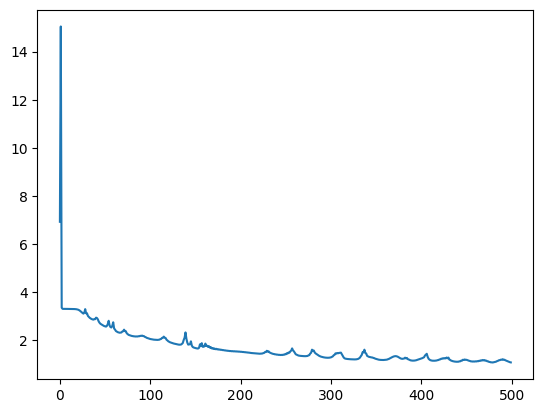

In [59]:
theta1,theta2=neural_networks(500,0.001)
test(theta1,theta2)